<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## 7 Keras Functional API - ResNet Model

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/1Keras.png?alt=media&token=9f4add09-14d3-49ed-bc11-f0497f6e96f1" width="200" height="200" align="right"/>

<font size="3">**The Keras <span style="color:#4285F4">Functional API</span> is a way to create models that are more flexible than the <span style="background-color: #ECECEC; color:#0047bb">tf.keras.Sequential</span> API. The functional API can handle models with <span style="color:#4285F4">non-linear topology</span>, <span style="color:#4285F4">shared layers</span>, and even <span style="color:#4285F4">multiple inputs or outputs</span>.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API1.png?alt=media&token=d17f0ff4-bca3-4e05-b09d-842406dde2c0" width="1000" align="center"/>

<font size="3">**In addition to models with multiple inputs and outputs, the <span style="color:#4285F4">Functional API</span> makes it easy to manipulate <span style="color:#4285F4">non-linear connectivity topologies</span> which are models with layers that are not connected sequentially, which the <span style="color:#4285F4">Sequential API</span> cannot handle.**</font>

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

<font size="3">**A common use case for this is <span style="color:#4285F4">residual block</span>. This is simply when the activation of a layer is <span style="color:#4285F4">fast-forwarded</span> to a deeper layer in the neural network. This simple architecture allows training much deeper neural networks.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/7API6.png?alt=media&token=c731df5d-20fa-4fdc-922f-db68afb870b2" width="280" align="center"/>

Reference: https://cv-tricks.com/keras/understand-implement-resnets/

<font size="3">**Let's build a ResNet model for CIFAR10 to demonstrate.**</font>

### <font color='#34A853'>Import libraries</font>
<hr style="border:2px solid ##34A853"> </hr>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

### <font color='#34A853'>Import images from CIFAR10 dataset</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The CIFAR-10 dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.**</font>

<font size="3">**The classes are completely mutually exclusive. Here are the classes in the dataset:**</font>


<table align="left">
    <tr>
        <td><b>Label</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>0</td>
        <td>airplane</td>
    </tr>
    <tr>
        <td>1</td>
        <td>automobile</td>
    </tr>
    <tr>
        <td>2</td>
        <td>bird</td>
    </tr>
    <tr>
        <td>3</td>
        <td>cat</td>
    </tr>
    <tr>
        <td>4</td>
        <td>deer</td>
    </tr>
    <tr>
        <td>5</td>
        <td>dog</td>
    </tr>
    <tr>
        <td>6</td>
        <td>frog</td>
    </tr>
    <tr>
        <td>7</td>
        <td>horse</td>
    </tr>
    <tr>
        <td>8</td>
        <td>ship</td>
    </tr>
    <tr>
        <td>9</td>
        <td>truck</td>
    </tr>
</table>

<font size="3">**Each example is a 32x32 colour images. Here's an example of how the data looks.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/5CNN3.png?alt=media&token=aeab9e18-9922-4ee7-a7a6-0a416b05e17b" width="500" align="left"/>

Reference: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### <font color='#34A853'>Preprocess the data - Normalization</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The images are stored in 28x28 numpy arrays, with pixel values ranging from 0 to 255. Therefore, value 255 is used to normalize pixel values to be between 0 and 1.**</font>   

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

<font size="3">**The labels are an array of integers, ranging from 0 to 9. Their corresponding class names can be stored in a list.**</font>   

In [4]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

### <font color='#34A853'>Explore the data</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Shapes of training and test images**</font>

In [5]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (50000, 32, 32, 3)
The shape of training labels is: (50000, 1)


In [6]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 32, 32, 3)
The shape of test labels is: (10000, 1)


<font size="3">**Label values**</font>

In [7]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


<font size="3">**Pixel values**</font>

The pixel values range from: 0.0 to 1.0


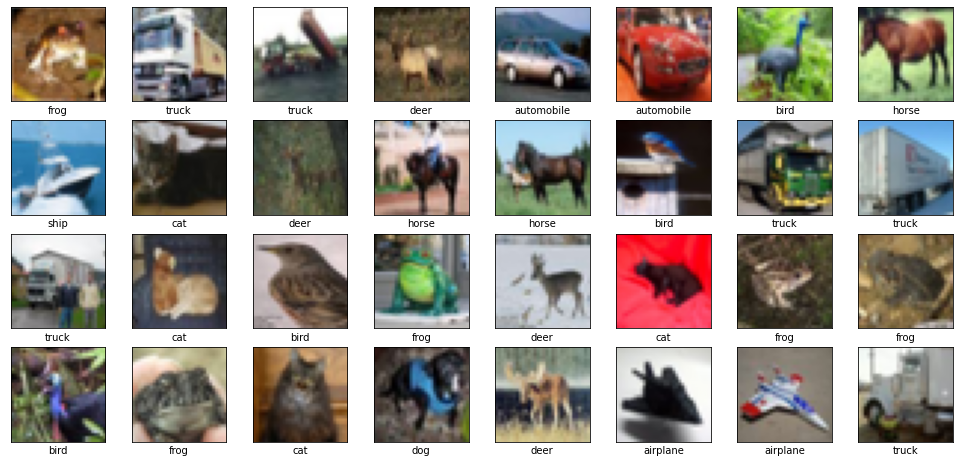

In [8]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### <font color='#34A853'>Build the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Setup and configure a Functional API model*</font>

In [9]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation ='softmax')(x) #used 'softmax'

model = keras.Model(inputs, outputs, name="toy_resnet")

<font size="3">**Here's the complete architecture:**</font><br>

In [10]:
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

<font size="3">**Plot the model**</font><br>

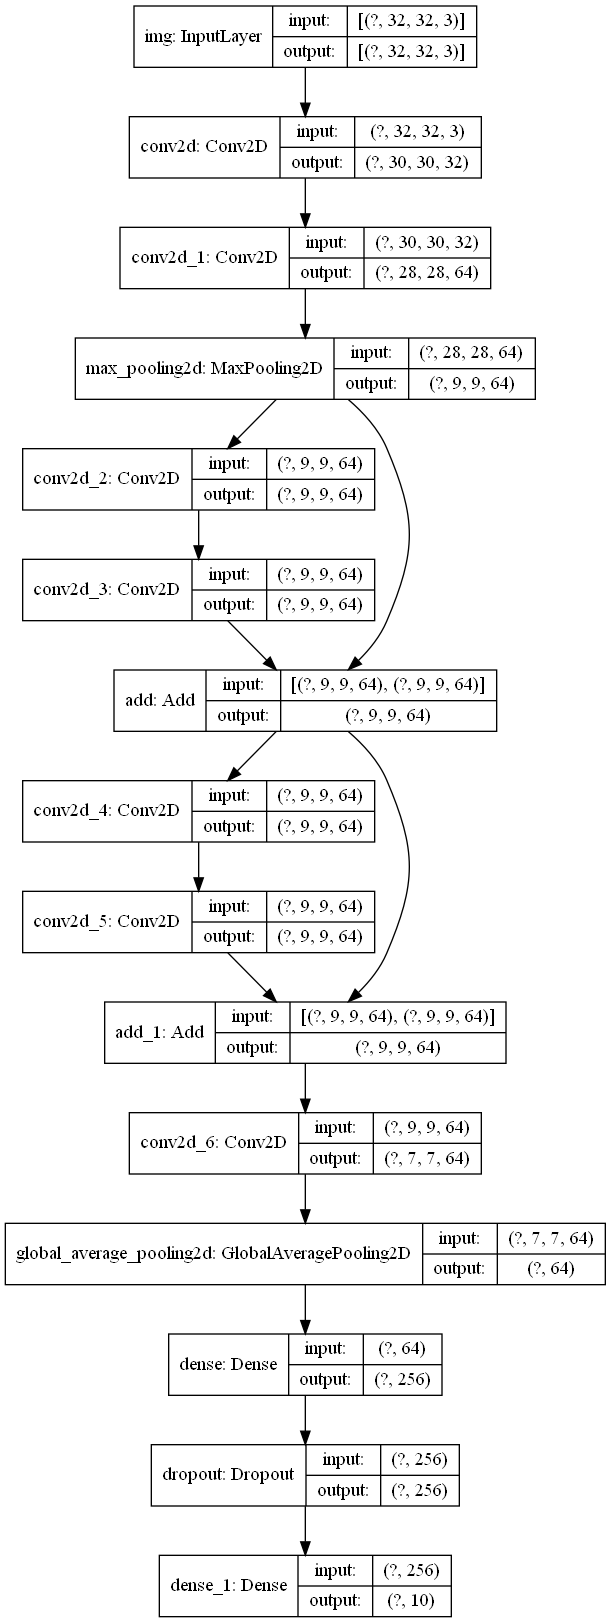

In [11]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

### <font color='Orange'>*2) Compile the model*</font>

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

<font size="3">**<span style="color:#4285F4">SparseCategoricalCrossentropy</span> and <span style="color:#4285F4">CategoricalCrossentropy</span> both compute categorical cross-entropy. The only difference is in how the targets/labels should be encoded.**</font>

> <font size="3">**For <span style="color:#4285F4">one hot</span> representation, <span style="color:#4285F4">CatergoricalCrossentropy</span> can be used.**</font>

> <font size="3">**For labels as integers (i.e. 0, 1, 2), <span style="color:#4285F4">SparseCategoricalCrossentropy</span> can be used.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">from_logits</span> argument informs the loss function whether the output is expected to be a logits tensor (i.e. normalized).**</font>

><font size="3">**By default, <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">False </span> which assumes that output encodes a probability distribution, such as outputs from softmax and sigmoid activations.**</font>

><font size="3">**If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, this assumes that output is a logits. In this case, softmax or sigmoid activations will automatically applied on the output values by the loss function. Hence, output layer doesn't need any probabilistic activation function.**</font>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, no activation function is needed in the output layer, e.g.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.png?alt=media&token=d053ce8a-8ccb-4087-a198-a19ced62e298" width="2000"/>

### <font color='#34A853'>Train the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Feed the model*</font>

In [15]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6723 - accuracy: 0.3512 - val_loss: 1.3330 - val_accuracy: 0.5013
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.1715 - accuracy: 0.5784 - val_loss: 1.0337 - val_accuracy: 0.6263
Epoch 3/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9616 - accuracy: 0.6587 - val_loss: 0.8817 - val_accuracy: 0.6853
Epoch 4/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.8373 - accuracy: 0.7053 - val_loss: 0.7771 - val_accuracy: 0.7283
Epoch 5/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.7524 - accuracy: 0.7397 - val_loss: 0.7801 - val_accuracy: 0.7356
Epoch 6/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6805 - accuracy: 0.7635 - val_loss: 0.7244 - val_accuracy: 0.7465
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.6202 - accuracy: 0.7854 - val_loss: 0

<font size="3">**To start training, <span style="background-color: #ECECEC; color:#0047bb">model.fit()</span> method can be used to "fit" the model with training data. In this example, the training data is in the <span style="color:#4285F4">train_images</span> and <span style="color:#4285F4">train_labels</span> arrays.**</font>

<font size="3">***Training accuracy***</font>
> <font size="3">**With modification from <span style="color:#4285F4">convolutional neural network</span> to <span style="color:#4285F4">ResNet</span>, as the model trains, the loss and accuracy metrics are improving. After 10 epochs, this model reaches an accuracy of about 0.83 (83%) on training data.**</font><br>

> <font size="3">**This improvement is mainly due to the fact that <span style="color:#4285F4">ResNet</span> is a deeper network and the <span style="color:#4285F4">residual blocks</span> can help avoid the vanishing gradient problems.**</font><br>

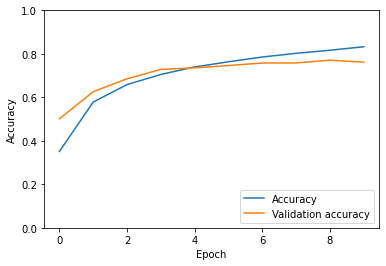

In [20]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 5s - loss: 0.7479 - accuracy: 0.7616
Test accuracy: 76 %


<font size="3">***Test accuracy***</font>
> <font size="3">**It turns out this ResNet has achieved a test accuracy of around 77%. Not bad with only 10 epochs!**</font>

### <font color='Orange'>*3) Verify and visualize predictions*</font>

<font size="3">**With trained network, it can be used to make predictions.**</font>
<font size="3">**Let's predict 16 images. Correct prediction labels are blue and incorrect prediction labels are red. The number indicates the precentage (i.e. confidence) for the predicted label.**</font>

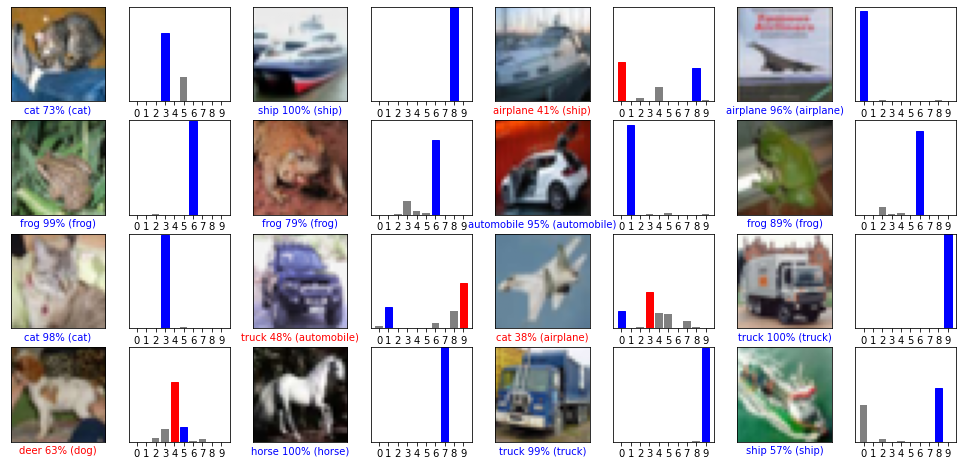

In [22]:
predictions = model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i][0]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i][0]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i][0]].set_color('blue')
    
plt.show()

### <font color='#34A853'>Use the trained model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Once the model is trained, images can be fed into the model for prediction.**</font>

In [23]:
# Grab an image from the test dataset.
img = test_images[60]
print(img.shape)

(32, 32, 3)


<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras</span> models are optimized to make predictions on a <span style="color:#4285F4">batch</span>, or collection, of examples at once. Therefore, even this is a single image prediction, image needs to be add into a list and make it like a <span style="color:#4285F4">batch</span>.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">np.expand_dims</span> function can help insert a new axis that will appear at the axis position in the expanded array shape.**</font>

In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


<font size="3">**Then, images can be fed into the model for prediction.**</font>

In [25]:
predictions_img = model.predict(img)

max_confidence = np.argmax(predictions_img[0])

print("The highest confidence is:", max_confidence)
print("The predicted class is:", class_names[max_confidence])

The highest confidence is: 7
The predicted class is: horse


<font size="3">**Let's visualize the results.**</font>

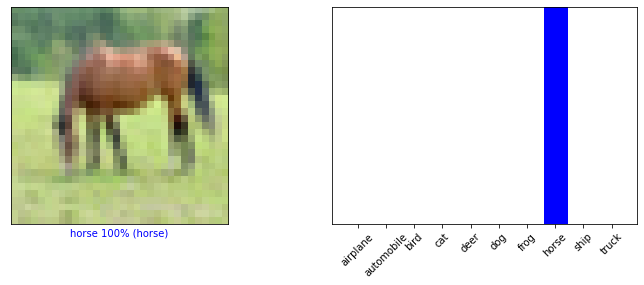

In [26]:
plt.figure(figsize=(12,4))

i=60
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i][0]:
    color = 'blue'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                            100*np.max(predictions[i]),
                            class_names[test_labels[i][0]]),
                            color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="grey")
plt.ylim([0, 1])  

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i][0]].set_color('blue')
    
plt.show()

<font size="3">**The model predicts the label correctly.**</font>

<hr style="border:2px solid ##34A853"> </hr>

##### This exercise is revised based on the TensorFlow guide (Reference: https://www.tensorflow.org/guide/keras/functional).